In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
train_data=pd.read_csv("Train.csv")

In [3]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
from pandas_profiling import ProfileReport

In [5]:
profile = ProfileReport(train_data,explorative=True)

In [6]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
print ("Rows     : " ,train_data.shape[0])
print ("Columns  : " ,train_data.shape[1])
print ("\nFeatures : \n" ,train_data.columns.tolist())
print ("\nUnique values :  \n",train_data.nunique())

Rows     :  8523
Columns  :  12

Features : 
 ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']

Unique values :  
 Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
data_description = train_data.describe()
data_description

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
train_data['Item_Weight'].fillna(train_data.Item_Weight.mean(),inplace=True)
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)

In [12]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
data_description = train_data.describe()
data_description

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
import matplotlib.pyplot as plt

In [15]:
for i in train_data:
    print(train_data[i].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
[ 9.3         5.92       17.5        19.2         8.93       10.395
 13.65       12.85764518 16.2        11.8        18.5        15.1
 17.6        16.35        9.         13.35       18.85       14.6
 13.85       13.          7.645      11.65        5.925      19.25
 18.6        18.7        17.85       10.          8.85        9.8
 13.6        21.35       12.15        6.42       19.6        15.85
  7.39       10.195       9.895      10.895       7.905       9.195
  8.365       7.97       17.7        19.35        8.645      15.6
 18.25        7.855       7.825       8.39       12.85       19.
  5.905       7.76       16.75       15.5         6.055       6.305
 20.85       20.75        8.895      19.7         8.75       13.3
  8.31       19.75       17.1        10.5         6.635      14.15
  8.89        9.1         7.5        16.85        7.485      11.6
 12.65       20.25        8.6        12.6         8.88       20.5
 13.5         

In [16]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].map({"low fat":"Low Fat",
                                                                    "Low Fat":"Low Fat",
                                                                    "LF":"Low Fat",
                                                                    "Regular":"Regular",
                                                                    "reg":"Regular"})

In [17]:
print(train_data['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

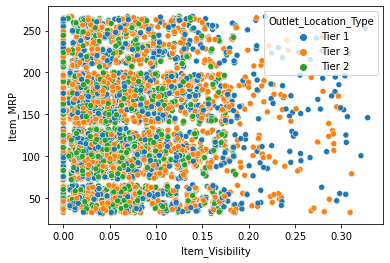

In [18]:
sns.scatterplot(x='Item_Visibility',y="Item_MRP",data=train_data,hue="Outlet_Location_Type")

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

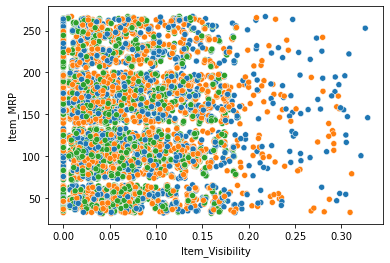

In [19]:
sns.scatterplot(x='Item_Visibility',y="Item_MRP",data=train_data,hue="Outlet_Location_Type",legend=None)

# Observations

- If MRP is high,visibility is less of tier2 and tier3 but tier1 is very high to costly products 
- tier2 having no visibility more 0.17 and 0.18 
- tier3 have some

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

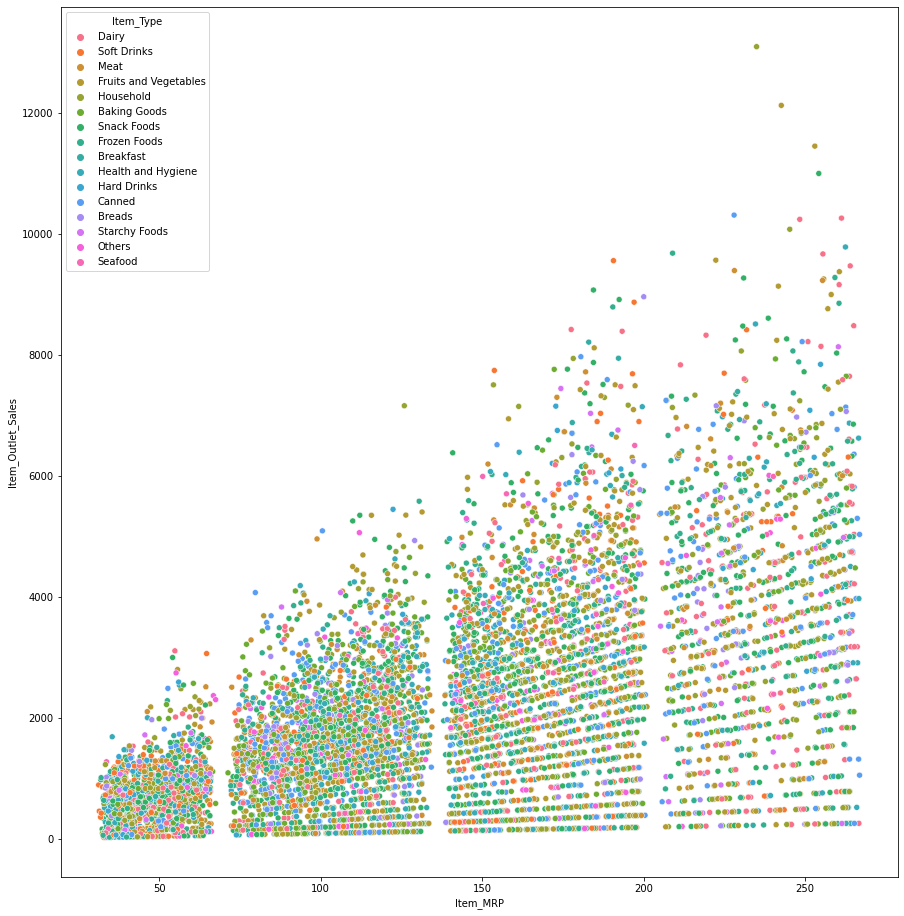

In [20]:
plt.figure(figsize=(15,16))
sns.scatterplot(x='Item_MRP',y="Item_Outlet_Sales",data=train_data,hue="Item_Type")

# Observations

- Household items makes more than 12000 of sales with low MRP
- Fruits also make more than 10000 sales

# Check the countplots of categorical column

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

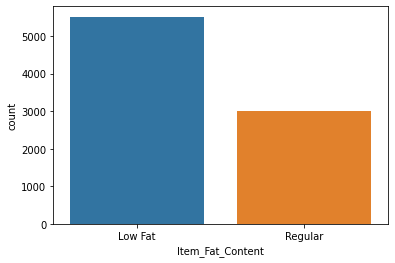

In [21]:
sns.countplot(x='Item_Fat_Content',data=train_data)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

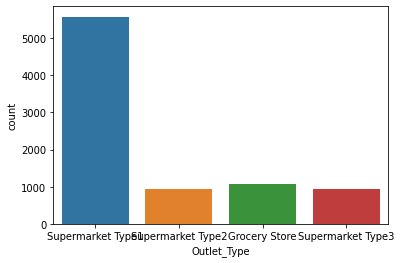

In [22]:
sns.countplot(x='Outlet_Type',data=train_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

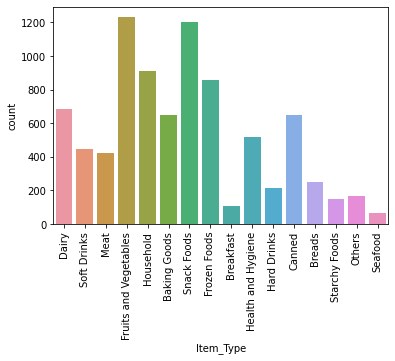

In [23]:
sns.countplot(train_data.Item_Type)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

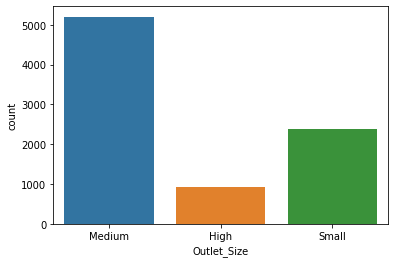

In [24]:
sns.countplot(train_data.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

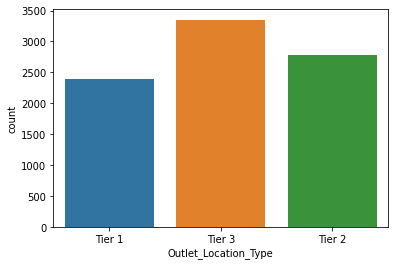

In [25]:
sns.countplot(train_data.Outlet_Location_Type)

<AxesSubplot:>

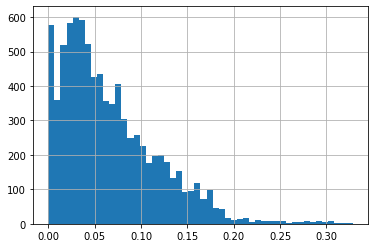

In [26]:
train_data.Item_Visibility.hist(bins=50)

In [27]:
train_data.Item_Visibility.mean()

0.06613202877895127

In [28]:
train_data.loc[train_data['Item_Visibility']==0,'Item_Visibility']=train_data.Item_Visibility.mean()

In [29]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


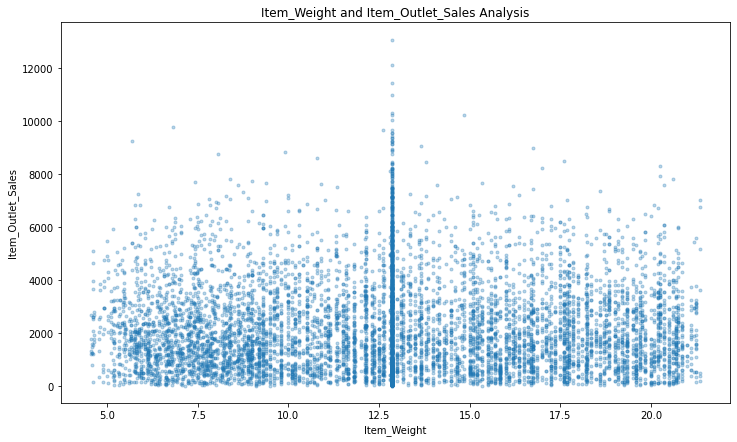

In [30]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train_data.Item_Weight, train_data["Item_Outlet_Sales"],'.', alpha = 0.3)

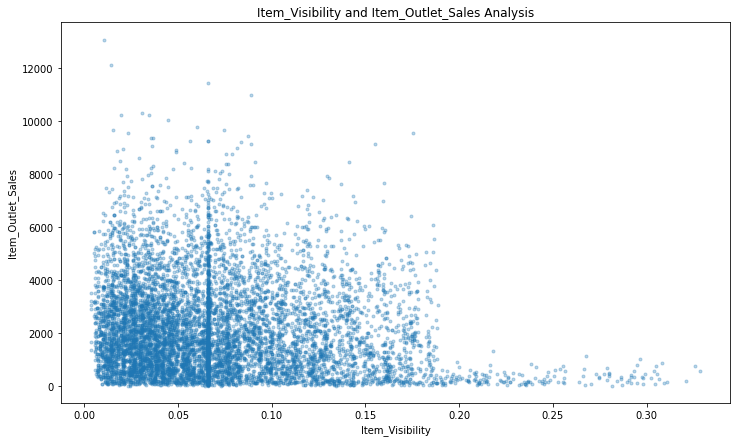

In [31]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train_data.Item_Visibility, train_data["Item_Outlet_Sales"],'.', alpha = 0.3)

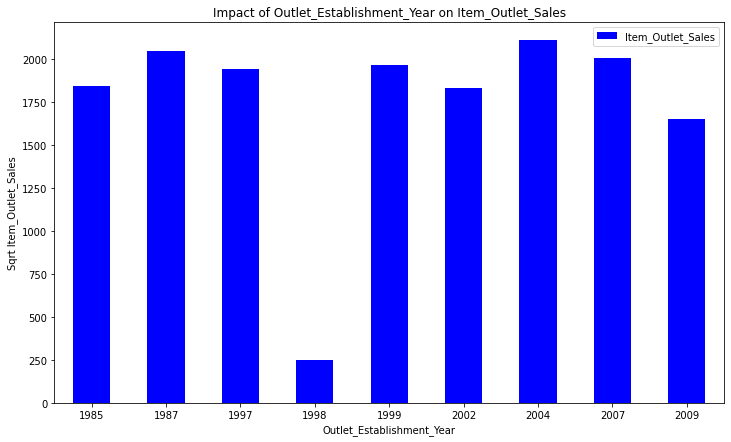

In [32]:
Outlet_Establishment_Year_pivot = \
train_data.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

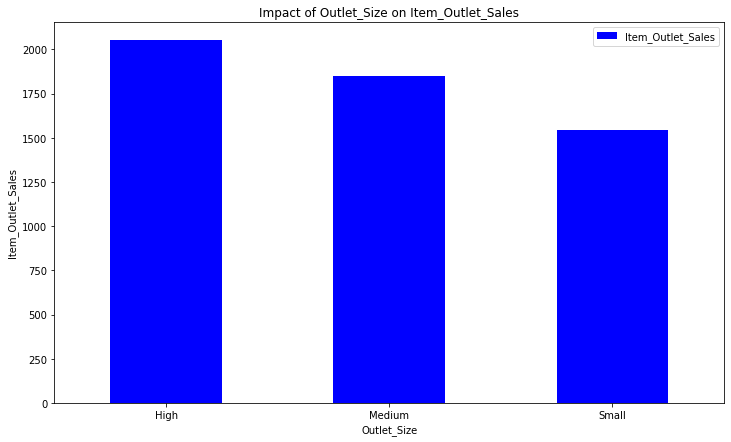

In [33]:
Outlet_Size_pivot = \
train_data.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

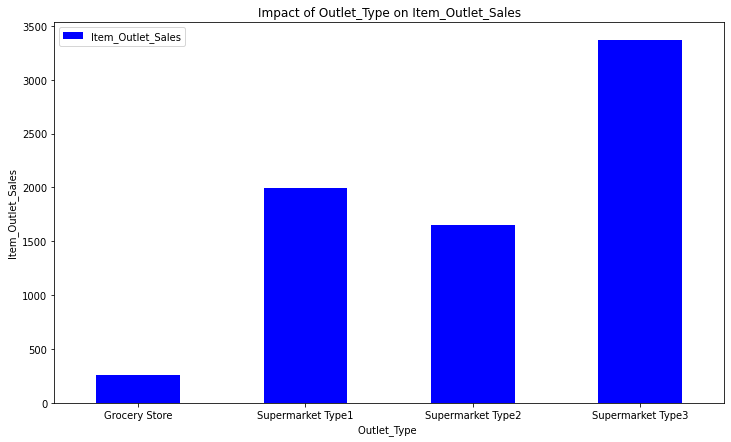

In [34]:
Outlet_Type_pivot = \
train_data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


In [35]:
categorical_data=train_data.select_dtypes(include="object")

In [36]:
categorical_data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [37]:
column_names=categorical_data.columns

In [38]:
for i in column_names:
    print(train_data[i].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
['Low Fat' 'Regular']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [39]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

categorical_data['Item_Fat_Content']=label.fit_transform(categorical_data['Item_Fat_Content'])
categorical_data['Item_Type']=label.fit_transform(categorical_data['Item_Type'])
categorical_data['Outlet_Size']=label.fit_transform(categorical_data['Outlet_Size'])
categorical_data['Outlet_Location_Type']=label.fit_transform(categorical_data['Outlet_Location_Type'])
categorical_data['Outlet_Type']=label.fit_transform(categorical_data['Outlet_Type'])
categorical_data['Item_Identifier']=label.fit_transform(categorical_data['Item_Identifier'])
categorical_data['Outlet_Identifier']=label.fit_transform(categorical_data['Outlet_Identifier'])
categorical_data['Item_Outlet_Sales']=train_data['Item_Outlet_Sales']

In [40]:
categorical_data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,0,4,9,1,0,1,3735.1380
1,8,1,14,3,1,2,2,443.4228
2,662,0,10,9,1,0,1,2097.2700
3,1121,1,6,0,1,2,0,732.3800
4,1297,0,9,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...
8518,370,0,13,1,0,2,1,2778.3834
8519,897,1,0,7,1,1,1,549.2850
8520,1357,0,8,6,2,1,1,1193.1136
8521,681,1,13,3,1,2,2,1845.5976


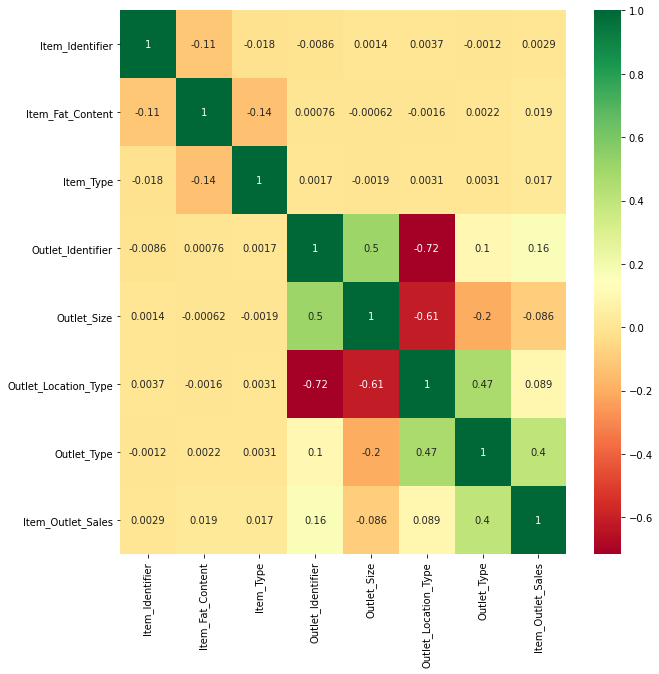

In [41]:
import seaborn as sns
X = categorical_data.iloc[:,0:21]  #independent columns
y = categorical_data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = categorical_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(categorical_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [42]:
numerical_columns = train_data.select_dtypes(exclude="object")

In [43]:
numerical_columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.066132,182.0950,1998,732.3800
4,8.930,0.066132,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


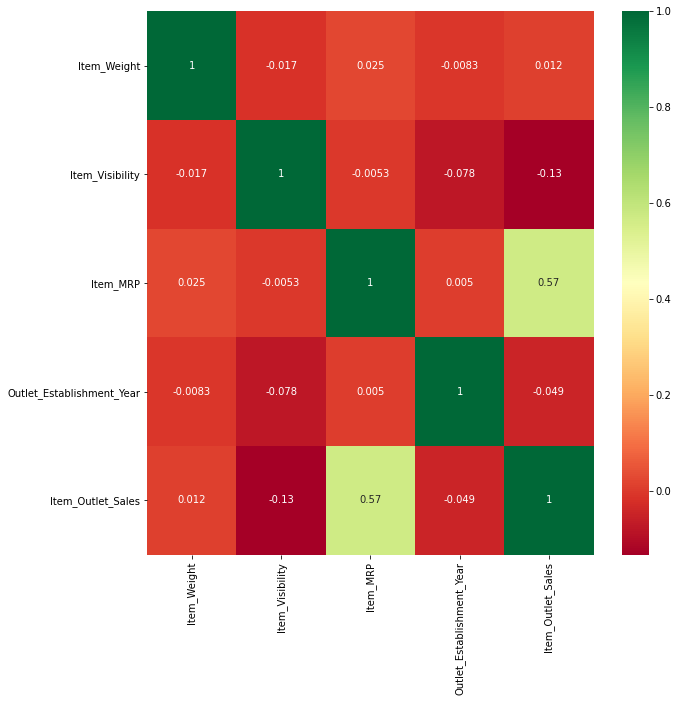

In [44]:
import seaborn as sns
X = numerical_columns.iloc[:,0:21]  #independent columns
y = numerical_columns.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = numerical_columns.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(numerical_columns[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [45]:
cols = numerical_columns.columns

In [46]:
cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

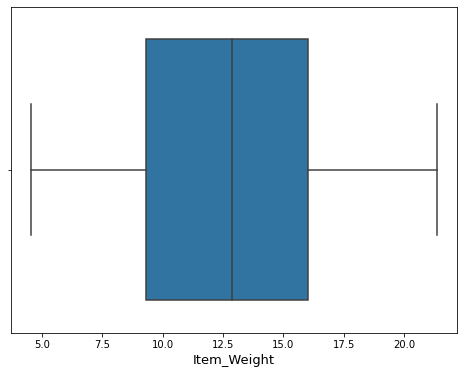

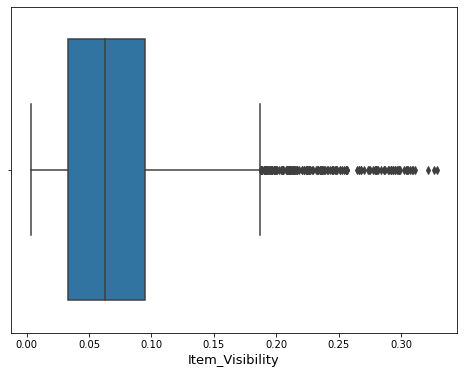

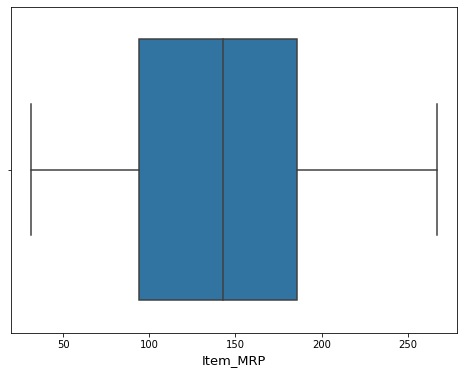

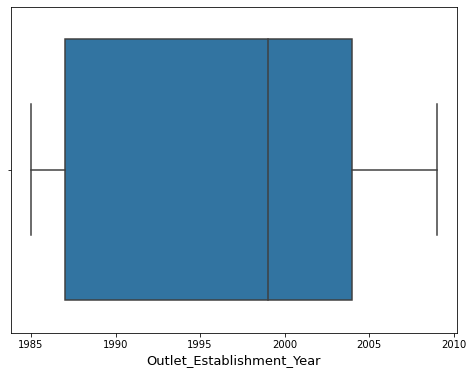

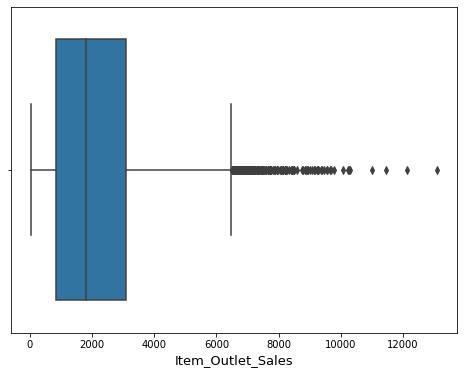

In [47]:
for i in cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=train_data,x=i)
    plt.xlabel(i,fontsize=13)

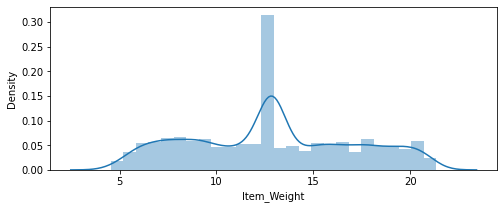

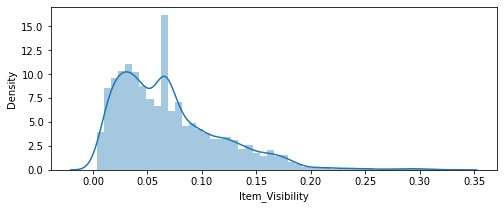

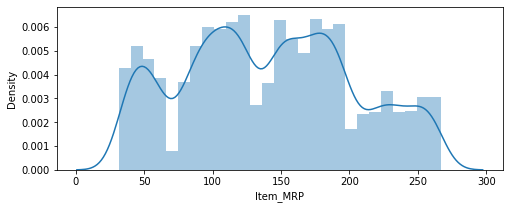

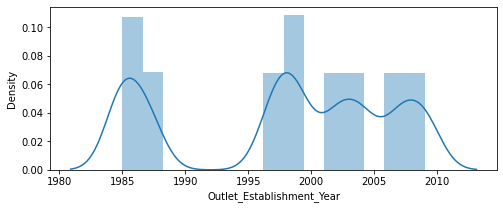

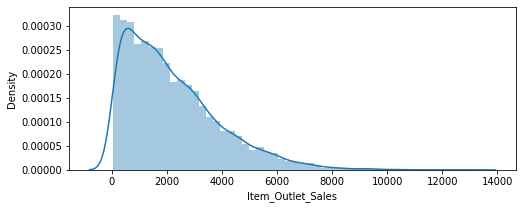

In [48]:
for i in cols:
    plt.figure(figsize=(8,3))
    sns.distplot(train_data[i])

In [49]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [50]:
no_need=["Item_Identifier"]

In [51]:
train_data.drop(no_need,axis=1,inplace=True)

In [52]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [53]:
def remove(dataframe,column):
    Q3 = dataframe[column].quantile(0.75)
    Q1 = dataframe[column].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 + (1.5 * IQR)
    df_no_outliers = dataframe[(dataframe[column]>lower) & (dataframe[column]<upper)]
    return df_no_outliers

In [54]:
final_data=pd.get_dummies(train_data,drop_first=True)

In [55]:
final_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.200,0.066132,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.066132,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [56]:
X=final_data.drop(columns=['Item_Outlet_Sales'],axis=1)
Y=final_data['Item_Outlet_Sales']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [58]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_reg_pre=lin_reg.predict(X_test)
lin_reg_accuracy=lin_reg.score(X_train, Y_train)
print('Accuracy : %.4g' %lin_reg_accuracy)


Accuracy : 0.5644


In [60]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, Y_train)
dt_reg_pre=lin_reg.predict(X_test)
dt_reg_accuracy=dt_reg.score(X_train, Y_train)
print('Accuracy : %.4g' %dt_reg_accuracy)

Accuracy : 1


In [61]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)
rf_reg_pre=rf_reg.predict(X_test)
rf_reg_accuracy=rf_reg.score(X_train, Y_train)
print('Accuracy : %.4g' %rf_reg_accuracy)

Accuracy : 0.9369


In [62]:
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_train, Y_train)
ridge_reg_pre=ridge_reg.predict(X_test)
ridge_reg_accuracy=ridge_reg.score(X_train, Y_train)
print('Accuracy : %.4g' %ridge_reg_accuracy)

Accuracy : 0.5644


In [63]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, Y_train)
lasso_reg_pre=lasso_reg.predict(X_test)
lasso_reg_accuracy=lasso_reg.score(X_train, Y_train)
print('Accuracy : %.4g' %lasso_reg_accuracy)

Accuracy : 0.5644


In [64]:
ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(X_train, Y_train)
ab_reg_pre=ab_reg.predict(X_test)
ab_reg_accuracy=ab_reg.score(X_train, Y_train)
print('Accuracy : %.4g' %ab_reg_accuracy)

Accuracy : 0.436


In [65]:
gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
gb_reg.fit(X_train, Y_train)
gb_reg_pre=gb_reg.predict(X_test)
gb_reg_accuracy=gb_reg.score(X_train, Y_train)
print('Accuracy : %.4g' %gb_reg_accuracy)

Accuracy : 0.6592


In [66]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, Y_train)
xgb_reg_pre=xgb_reg.predict(X_test)
xgb_reg_accuracy=xgb_reg.score(X_train, Y_train)
print('Accuracy : %.4g' %xgb_reg_accuracy)

Accuracy : 0.8576


In [67]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 20, 100,500], 'max_depth': [2, 4, 6, 8], 
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 200, 300], 
            }
        },
        'gradientboost': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [10, 20, 500], 'max_depth': [2, 4, 6, 8], 
            }
        }

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.final_data(scores,columns=['model','best_score','best_params'])

#find_best_model_using_gridsearchcv(X, y)

In [68]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)
rf_reg_pre=rf_reg.predict(X_test)
rf_reg_accuracy=rf_reg.score(X_train, Y_train)
print('Accuracy : %.4g' %rf_reg_accuracy)

Accuracy : 0.9372


In [72]:
# Save the model as serialized object pickle
import pickle
with open('new.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)